<center><font size="16">Human Resource Analysis</font></center>

Companies want to improve and maintain a healthy relationship and environment for their employees. This can be achieved by recognizing and understanding the important factors that are associated with employee turnover and taking care of them might add into the productivity and growth of the employees. These insights can help managers for grabing the opportunity to take corrective steps to build and preserve their successful business. 
<br><br>
In this notebook, we will work on the project that is based on understanding what factors contributed most to employee turnover and to create a model that can predict if a certain employee will leave the company or not.<br><br>

### Column Description

- satisfacion_level: Showing satisfaction of a particular employee
- last_evaluation: Showing last evaluation of a particular employee
- number_project: Showing number of projects handled a particular employee
- average_montly_hours: Showing the monthly hours that were spent the particular emloyee
- time_spend_company: Shows the number of years spent by the particular employee in the company.
- Work_accident: Showing an employee has whether been part of the company or not.
- left: Tells either and employee has left the company or not. Shows two values 0= not left, 1= left
- promotion_last_5years: Shows that the whether the employee has got any promotion in the last 5 years or not.
- dept: Shows the departments
- salary: Shows the salary type of the employee

# Wrangling & EDA

## 1. Loading Packages

In [1912]:
#Write code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

## 2. Loading Data & Basic Analysis

- **Task 1**:Load the data and after making a copy of it, find **shape, data types, basic statistics, and null values** from the data set

In [1998]:
# Load the data
data= pd.read_csv('HR_comma_sep.csv')
df = data.copy()


In [1999]:
# Find the shape
df.shape

(14999, 10)

In [2000]:
df.columns = ['satisfy','last_Ev', 'proj', 'mon_hrs', 'time', 'accident', 'left', 'promotion', 'dept', 'salary']

In [2001]:
df.head()

,satisfy,last_Ev,proj,mon_hrs,time,accident,left,promotion,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [2002]:
# Display the top 5 rows.
df.dtypes

satisfy      float64
last_Ev      float64
proj           int64
mon_hrs        int64
time           int64
accident       int64
left           int64
promotion      int64
dept          object
salary        object
dtype: object

In [2003]:
df.describe()

,satisfy,last_Ev,proj,mon_hrs,time,accident,left,promotion
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [2004]:
# Find the basic statistics
df.describe(include=['O'])

,dept,salary
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316


In [2005]:
# Find the null values
df.isnull().sum()

satisfy      0
last_Ev      0
proj         0
mon_hrs      0
time         0
accident     0
left         0
promotion    0
dept         0
salary       0
dtype: int64

# 3. Exploration

Before moving ahead, let us check the details of different variables in the data

**Task 2: Find out the how many employees left the company?**

In [2006]:
#(df['left'][df['left']==1]).value_counts()
#dfleft = df[df['left']==1]
#dfleft[df['left']==1]

In [2007]:
# Count of how many employees left the company
df['left'].value_counts(normalize=True).reset_index()

,index,left
0,0,0.761917
1,1,0.238083


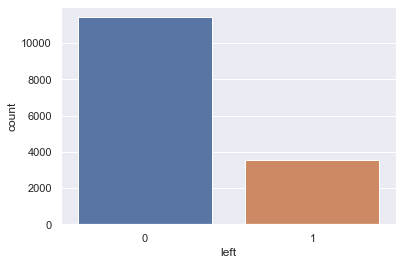

In [2008]:
sns.countplot(x='left',data=df)
plt.show()

**Question:What can you interpret from the plot above?** 

Answer: 

Employee churn is about 31% with around 3571 employees left the company and 11428 were retained

**Task 3: Find out the number of projects being handled.**

In [2009]:
data['number_project'].sum()

57042

<AxesSubplot:xlabel='proj', ylabel='count'>

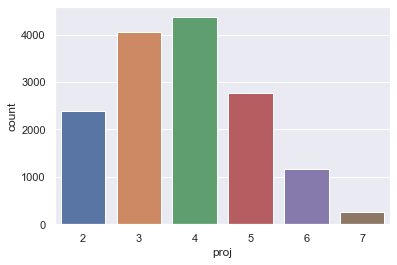

In [2010]:
# Write code here
#x = df['number_project'].sum()
#sns.catplot(x='number_project', data=df, hue='left',col='salary', kind='count')
sns.countplot(x='proj', data=df)

In [2011]:
df['proj'].value_counts()

4    4365
3    4055
5    2761
2    2388
6    1174
7     256
Name: proj, dtype: int64

**Question: What insights can you infer from the above plot?**

Answer: 

The highest number of projects handeled by the employees are four with 7 being the lowesr projects handled by the employees

**Task 4: Find out how number of projects contributed to employee turn-over.**
<br>
<br>

In [2012]:
#sns.countplot(x='number_project', data=df, hue='left')
df_turnover = df[df['left']==1]
df_turnover['proj'].value_counts().reset_index()

,index,proj
0,2,1567
1,6,655
2,5,612
3,4,409
4,7,256
5,3,72


**Task 5:** Make a plot of your findings (only turn-over employees)

<AxesSubplot:xlabel='proj', ylabel='count'>

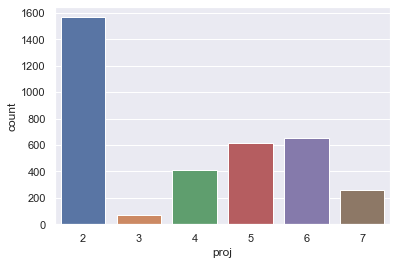

In [2013]:

sns.countplot(x='proj', data=df_turnover)

**Question: What can you conclude from the above graph? Which people are leaving the company(as per number of projects)? What can be the reasons behind?**

Answer: 

As seen from the graph and the above dataframe as well, most of the employyes that are leaving the company were only working on 2 projects and the least amount of perples leaving the company are working on 3 projects.

## **Time spent at the company**

**Task 6: Find out how time spend at company can lead to employee turn over. Show the following plots.**<br>
- Count of Number of years spent by employees.
- After how many years are mostly employees leaving the company? 

*Hint: For the second part do the similar procedure as done in case of 'number_projects' above. Try to find the **percetage** to show that after how much time/years did most of employees exactly leave.*

In [2014]:
df.columns

Index(['satisfy', 'last_Ev', 'proj', 'mon_hrs', 'time', 'accident', 'left',
       'promotion', 'dept', 'salary'],
      dtype='object')

<AxesSubplot:xlabel='time', ylabel='count'>

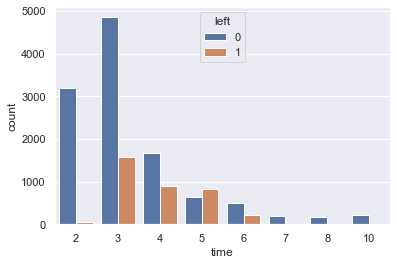

In [2015]:
# Show the plot for the count of years here
sns.countplot(x='time', data=df, hue='left')

**Question: What is the maximum number of time spend by the employees?**

Answer: 

Maximum time spent by most of the employees is 3 years

In [2016]:
# Write the code here to get the percentage of employees leaving.
df_new = df.groupby('time')['left'].value_counts(normalize=True).reset_index(name='Perc')
df_new


,time,left,Perc
0,2,0,0.983662
1,2,1,0.016338
2,3,0,0.753841
3,3,1,0.246159
4,4,0,0.651936
5,4,1,0.348064
6,5,1,0.565513
7,5,0,0.434487
8,6,0,0.708914
9,6,1,0.291086


<AxesSubplot:xlabel='time', ylabel='Perc'>

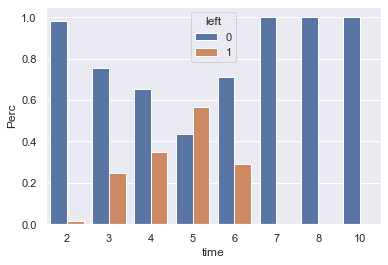

In [2017]:
# Write the code here to draw a bar plot showing years after which employees are likely to leave
sns.barplot(x='time', y='Perc', data=df_new, hue='left')

**Question: After what time period are employees most likely to leave the company ?**

Answer:

After 5 years, around 60% of the employees are likely to leave

## **Employees engaged in any work accident**

**Task 7: Find out that how many employees were engaged in work accident and how many of them actually left? Use count plots to show your results**

In [2018]:
# Number of employees involved in work accident
df['accident'].value_counts()

0    12830
1     2169
Name: accident, dtype: int64

In [2019]:
df_accident_perc = df.groupby('accident')['left'].value_counts(normalize=True).reset_index(name='Percentage')
df_accident_perc.head()


,accident,left,Percentage
0,0,0,0.734840
1,0,1,0.265160
2,1,0,0.922084
3,1,1,0.077916


<AxesSubplot:xlabel='accident', ylabel='Percentage'>

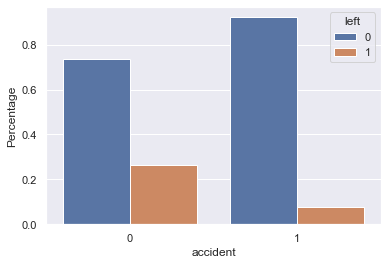

In [2020]:
sns.barplot(x='accident', y='Percentage', data=df_accident_perc, hue='left')

**Question: What can you conclude from the graph above?**

Answer: 

Most of the people involved in accident didn't leave the company. Only like 8% of the people involved in accident left the company

In [2021]:
# Number of employees involved in work accident and left or not left
df_accident = df.groupby('accident')['left'].value_counts().reset_index(name='Percentage')
df_accident.head()

,accident,left,Percentage
0,0,0,9428
1,0,1,3402
2,1,0,2000
3,1,1,169


## **Promotions in last 5 years**

**Task 8: How many number of employees got the promotion in last 5 year and how many of them left?**

In [2022]:
# Write code here
df['promotion'].value_counts()

0    14680
1      319
Name: promotion, dtype: int64

Answer: 

Only 319 people in the last 5 years got promoted

In [2023]:
df_prom = df.groupby('promotion')['left'].value_counts().reset_index(name='count')
df_prom.head()


,promotion,left,count
0,0,0,11128
1,0,1,3552
2,1,0,300
3,1,1,19


<AxesSubplot:xlabel='promotion', ylabel='Perc'>

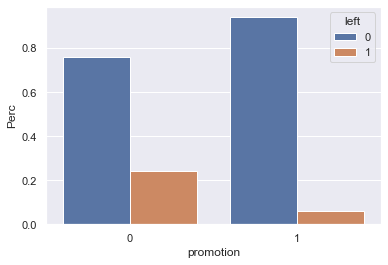

In [2024]:
df_prom_perc = df.groupby('promotion')['left'].value_counts(normalize=True).reset_index(name='Perc')
sns.barplot(x='promotion', y='Perc', data=df_prom_perc, hue='left')

In [2025]:
df_prom_perc

,promotion,left,Perc
0,0,0,0.758038
1,0,1,0.241962
2,1,0,0.940439
3,1,1,0.059561


As can be seen from the above trends, around 25% of the people who haven't been promoted in the last 5 years had around 25% churn rate. whereas only 6 percent people who were promoted left the company

## **Salary trends**

**Task 9: What are the salary trends in the data? Use graphical representation for explanation**

<AxesSubplot:xlabel='salary', ylabel='count'>

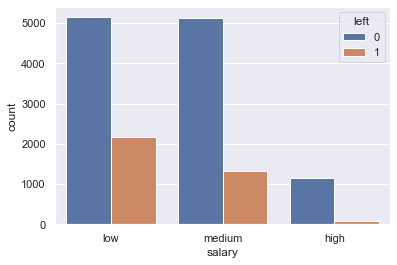

In [2026]:
#Write code here
sns.countplot(x='salary', data=df, hue='left')

Answer: 

**Quesion: Which type salary holders are most likely to leave? Try to show the percentage of employees who left according to their salaries, using a bar plot or as you like.**

In [2027]:
# Write code here
df_salary_perc = df.groupby('salary')['left'].value_counts(normalize=True).reset_index(name='Perc')
df_salary_perc

,salary,left,Perc
0,high,0,0.933711
1,high,1,0.066289
2,low,0,0.703116
3,low,1,0.296884
4,medium,0,0.795687
5,medium,1,0.204313


<AxesSubplot:xlabel='salary', ylabel='Perc'>

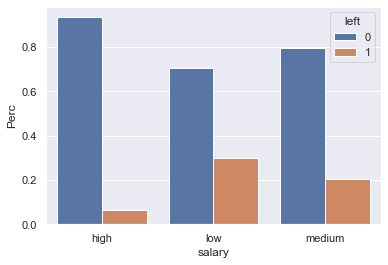

In [2028]:
# Write code here for plot
sns.barplot(x='salary', y='Perc', data=df_salary_perc, hue='left')

**Question: What does the above plot show?**

Answer:

Approx 30% Lowest salary employees left the company, approx 20% medium salary employees left the company and only 6% high salary employees left the company

## **Employees per Department**

**Task 10: Find out employees per department and also see which which department has highest number of employees leaving the company.**

In [2029]:
# Write the code here to check employee count in each department. You can use a graphical representation or use simple code to check.
df['dept'].value_counts().reset_index()

,index,dept
0,sales,4140
1,technical,2720
2,support,2229
3,IT,1227
4,product_mng,902
5,marketing,858
6,RandD,787
7,accounting,767
8,hr,739
9,management,630


In [2030]:
#employees per dept who have left the company
df['dept'][df['left']==1].value_counts().reset_index()

,index,dept
0,sales,1014
1,technical,697
2,support,555
3,IT,273
4,hr,215
5,accounting,204
6,marketing,203
7,product_mng,198
8,RandD,121
9,management,91


In [2031]:
df_dept = df.groupby('dept')['left'].value_counts().reset_index(name='count')
df_dept

,dept,left,count
0,IT,0,954
1,IT,1,273
2,RandD,0,666
3,RandD,1,121
4,accounting,0,563
5,accounting,1,204
6,hr,0,524
7,hr,1,215
8,management,0,539
9,management,1,91


**Question: Which department has highest percentage of turn-over? Use graphical representation to find out.**

In [2032]:
df_dept_perc = df.groupby('dept')['left'].value_counts(normalize=True).reset_index(name='Perc')
df_dept_perc

,dept,left,Perc
0,IT,0,0.777506
1,IT,1,0.222494
2,RandD,0,0.846252
3,RandD,1,0.153748
4,accounting,0,0.734029
5,accounting,1,0.265971
6,hr,0,0.709066
7,hr,1,0.290934
8,management,0,0.855556
9,management,1,0.144444


<AxesSubplot:xlabel='dept', ylabel='Perc'>

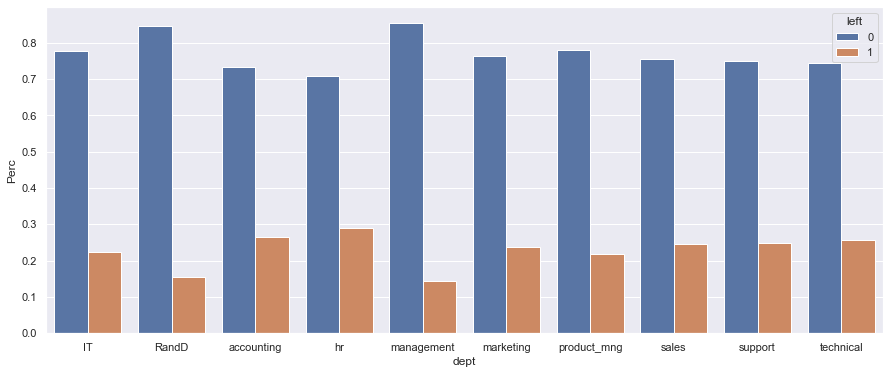

In [2033]:
plt.figure(figsize=(15,6))
sns.barplot(x='dept', y='Perc', data=df_dept_perc, hue='left')

The HR department has the highest amount of turnover followed by accounting department

**Question: Which department has maximum number of employees?**

Answer:

Sales department has the highest number of employees as can be seen from the below cell

In [2034]:
# Write code here
listt = [df['dept'].value_counts().idxmax(), df['dept'].value_counts().max()]
listt

['sales', 4140]

In [2035]:
# Write code here to draw the plot


Answer: 

## **Satisfaction Level**

**Task 11: Show the satisfaction level of employees who left the company and those who didn't leave, using a kde plot**

In [2036]:
df['satisfy'].value_counts().idxmax()

0.1

<AxesSubplot:xlabel='satisfy', ylabel='Density'>

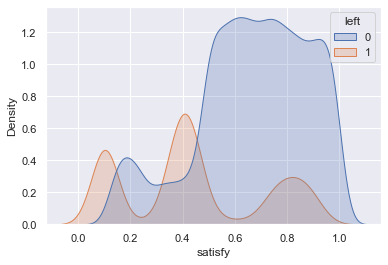

In [2037]:
# Write the code here
sns.kdeplot(x='satisfy', data=df, hue='left', shade=True)

In [2038]:
#df_satisfy = df[df['satisfy']==0.4].value_counts().reset_index()
#df_satisfy[df_satisfy['left']==1]

**Question: What can you conclude from the plot above?**

Answer:

Most of the people who left the organization have the satisfaction level of around 0.4

# Feature Engineering

For feature engineering we will two new features. Looking at the the satisfcation we can conclude that people who are leaving have a low satisfaction level, most likely below 0.5 are leaving and people having a high satisfaction_level, most likely above 0.5 are likely to stay. 

**Task 12: Make a new feature 'satisfaction_level_type' through following conditions:**<br>
- **satisfaction_level >= 0.5 then satisfaction_level_type = 'High'**
- **satisfaction_level < 0.5 then satisfaction_level_type = 'Low'**

In [2039]:
df.head()

,satisfy,last_Ev,proj,mon_hrs,time,accident,left,promotion,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [2040]:
type(df.iloc[2,0])

numpy.float64

In [2041]:
# Write the code here to make bins as mentioned above
df['satisfaction_level_type'] = ''
df.loc[df['satisfy'] < 0.5, 'satisfaction_level_type'] = df.loc[df['satisfy'] < 0.5, 'satisfaction_level_type'].replace('','Low')
df.loc[df['satisfy'] >= 0.5, 'satisfaction_level_type'] = df.loc[df['satisfy'] >= 0.5, 'satisfaction_level_type'].replace('','High')

In [2042]:
df.head()

,satisfy,last_Ev,proj,mon_hrs,time,accident,left,promotion,dept,salary,satisfaction_level_type
0,0.38,0.53,2,157,3,0,1,0,sales,low,Low
1,0.80,0.86,5,262,6,0,1,0,sales,medium,High
2,0.11,0.88,7,272,4,0,1,0,sales,medium,Low
3,0.72,0.87,5,223,5,0,1,0,sales,low,High
4,0.37,0.52,2,159,3,0,1,0,sales,low,Low



**Task 13: Make a count plot for satisfaction_level_type and and see which type has more turn over using hue='left'**

<AxesSubplot:xlabel='satisfaction_level_type', ylabel='count'>

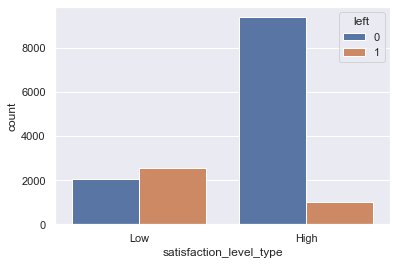

In [2043]:
# Write Code Here
sns.countplot(x='satisfaction_level_type', data = df, hue='left')

Previously we saw that employees having high number of projects are leaving. We also saw that some employees with extremely less number of projects are also leaving the company. Let us see how number of projects and satisfaction level are related.<br>
We can see this by checking the satisfaction level type and number of projects in according to that specific type. 

In [2044]:
# Write Code Here
df.groupby(['proj','satisfaction_level_type'])['left'].value_counts().reset_index(name='count')

,proj,satisfaction_level_type,left,count
0,2,High,0,558
1,2,High,1,33
2,2,Low,1,1534
3,2,Low,0,263
4,3,High,0,3460
5,3,High,1,44
6,3,Low,0,523
7,3,Low,1,28
8,4,High,0,3441
9,4,High,1,366


**Make a Plot of your findings**

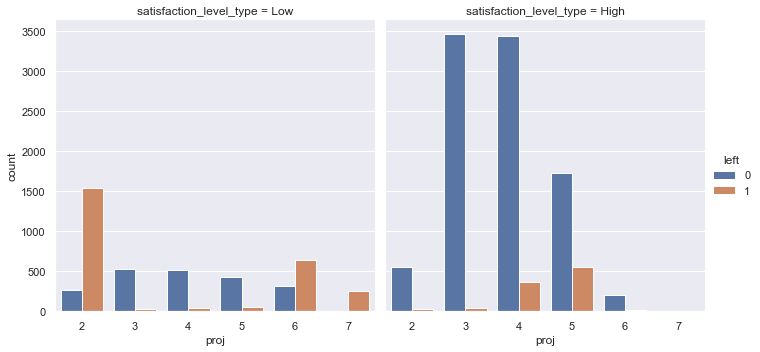

In [2045]:
sns.catplot(x='proj', col='satisfaction_level_type', hue='left', data=df, kind='count')

**Question:** What did you infer drom the above plot

**Answer:**

We can say that having low satisfaction level with least and highest number of projects leads to a greater emplloyee turnover. whereas with high satisfaction, the employee turnover is still very less

Now lets check number of projects for low satisfaction level

<AxesSubplot:xlabel='proj', ylabel='count'>

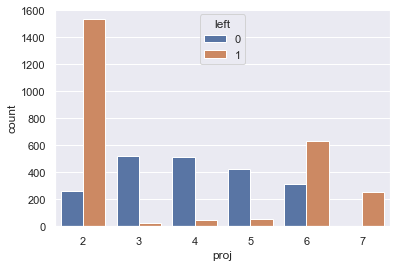

In [2046]:
# Write Code Here
df_satisfy_low = df[df['satisfaction_level_type']=='Low']
sns.countplot(x='proj', data=df_satisfy_low, hue='left')

Notice that there is are people associated with low satisfaction level, have either too less projects, i.e. number of projects = 2 or high number of projects i.e. 6 or even 7. The over all count for 7 is low but there is a significant raise if we compare its count with higher satisfaction level.

**Task 14: Make a new column 'employee_type' and assign categories as following:**<br>
- **If number of projects is equal to 2 then employee_type='unburdened'**
- **If number of projects is between 3 and 5 then employee_type = 'Satisfactory'**
- **If number of projects is 6 and above then employee_type='Burdened'**

In [2047]:
df['employee_type']=''

In [2048]:
# Write code here
df.loc[df['proj']<=2,'employee_type'] = df.loc[df['proj']<=2,'employee_type'].replace('','unburdened')
df.loc[(df['proj']>=3) & (df['proj']<=5),'employee_type'] = df.loc[(df['proj']>=3) & (df['proj']<=5),'employee_type'].replace('','satisfactory')
df.loc[df['proj']>=6,'employee_type'] = df.loc[df['proj']>=6,'employee_type'].replace('','burdened')

In [2049]:
df.head()

,satisfy,last_Ev,proj,mon_hrs,time,accident,left,promotion,dept,salary,satisfaction_level_type,employee_type
0,0.38,0.53,2,157,3,0,1,0,sales,low,Low,unburdened
1,0.80,0.86,5,262,6,0,1,0,sales,medium,High,satisfactory
2,0.11,0.88,7,272,4,0,1,0,sales,medium,Low,burdened
3,0.72,0.87,5,223,5,0,1,0,sales,low,High,satisfactory
4,0.37,0.52,2,159,3,0,1,0,sales,low,Low,unburdened


In [2050]:
#sns.kdeplot(x='last_Ev',data=df, hue='left', shade='True')

**Task 15: Make a countplot to see which type of employee is leaving**

<AxesSubplot:xlabel='employee_type', ylabel='count'>

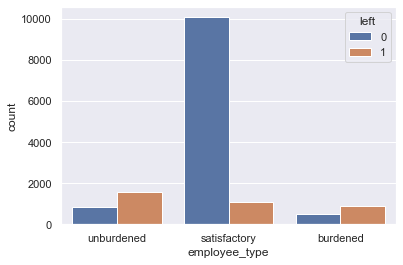

In [2051]:
# Write code here
sns.countplot(x='employee_type', data=df, hue='left')

In [2052]:
#sns.kdeplot(x='proj', hue='left', data=df, shade=True)

### Remove Redundant Features

Hint: Look for the columns used in Feature Engineering

In [2053]:
# Write code here
df.drop(['proj','satisfy'], axis=1, inplace=True)

In [2054]:
df.head()

,last_Ev,mon_hrs,time,accident,left,promotion,dept,salary,satisfaction_level_type,employee_type
0,0.53,157,3,0,1,0,sales,low,Low,unburdened
1,0.86,262,6,0,1,0,sales,medium,High,satisfactory
2,0.88,272,4,0,1,0,sales,medium,Low,burdened
3,0.87,223,5,0,1,0,sales,low,High,satisfactory
4,0.52,159,3,0,1,0,sales,low,Low,unburdened


### Evaluation

<AxesSubplot:xlabel='last_Ev', ylabel='Density'>

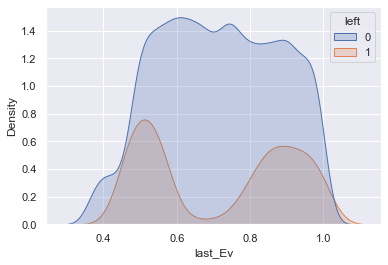

In [2055]:
sns.kdeplot(x='last_Ev', hue='left', data=df, shade=True)

In [2056]:
#df['eval_type']=''
#df.loc[(df['last_Ev'] >=0.45) & (df['last_Ev'] <=0.58),'eval_type'] = df.loc[(df['last_Ev'] >=0.45) & (df['last_Ev'] <=0.58) ,'eval_type'].replace('','Bad_Eval')
#df.loc[(df['last_Ev'] >=0.8) & (df['last_Ev'] <=1.0), 'eval_type'] = df.loc[(df['last_Ev'] >=0.8) & (df['last_Ev'] <=1.0), 'eval_type'].replace('','Bad_Eval')

In [2057]:
#df.loc[(~(df['last_Ev'] >=0.45) & (df['last_Ev'] <=0.58)),'eval_type'] = df.loc[~((df['last_Ev'] >=0.45) & (df['last_Ev'] <=0.58)) ,'eval_type'].replace('','Good_Eval')
#df.loc[~((df['last_Ev'] >=0.8) & (df['last_Ev'] <=1.0)), 'eval_type'] = df.loc[~((df['last_Ev'] >=0.8) & (df['last_Ev'] <=1.0)), 'eval_type'].replace('','Good_Eval')

In [2058]:
#df['eval_type'].unique()

In [2059]:
#sns.countplot(x='eval_type', hue='left', data=df)

### Montlhy Hours

<AxesSubplot:xlabel='mon_hrs', ylabel='Density'>

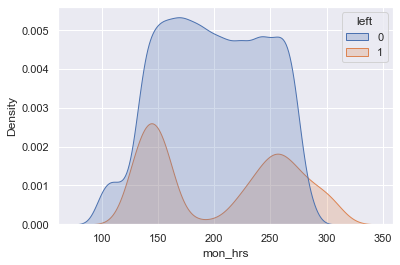

In [2060]:
sns.kdeplot(x='mon_hrs', hue='left', data=df, shade=True)

In [2061]:
#df['Mon_hrs_type']=''
#df.loc[(df['mon_hrs'] >=110) & (df['mon_hrs'] <=170),'Mon_hrs_type'] = df.loc[(df['mon_hrs'] >=110) & (df['mon_hrs'] <=170) ,'Mon_hrs_type'].replace('','Bad_MH')
#df.loc[(df['mon_hrs'] >=215) & (df['mon_hrs'] <=310), 'Mon_hrs_type'] = df.loc[(df['mon_hrs'] >=215) & (df['mon_hrs'] <=310), 'Mon_hrs_type'].replace('','Good_MH')

In [2062]:
#df.loc[~((df['mon_hrs'] >=110) & (df['mon_hrs'] <=170)),'Mon_hrs_type'] = df.loc[~((df['mon_hrs'] >=110) & (df['mon_hrs'] <=170)) ,'Mon_hrs_type'].replace('','Bad_MH')
#df.loc[~((df['mon_hrs'] >=215) & (df['mon_hrs'] <=310)), 'Mon_hrs_type'] = df.loc[~((df['mon_hrs'] >=215) & (df['mon_hrs'] <=310)), 'Mon_hrs_type'].replace('','Good_MH')

In [2063]:
#sns.countplot(x='Mon_hrs_type', hue='left', data=df)

In [2064]:
df.head()

,last_Ev,mon_hrs,time,accident,left,promotion,dept,salary,satisfaction_level_type,employee_type
0,0.53,157,3,0,1,0,sales,low,Low,unburdened
1,0.86,262,6,0,1,0,sales,medium,High,satisfactory
2,0.88,272,4,0,1,0,sales,medium,Low,burdened
3,0.87,223,5,0,1,0,sales,low,High,satisfactory
4,0.52,159,3,0,1,0,sales,low,Low,unburdened


<AxesSubplot:>

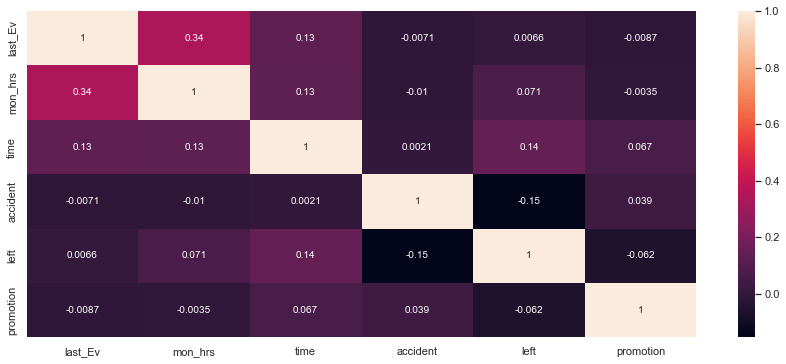

In [2065]:
corr_df = df.corr()
plt.figure(figsize=(15,6))
sns.heatmap(corr_df, annot=True)

# Machine Learning

Before moving further, we need to apply one-hot encoding on categorical variables i.e. **dept, salary, satisfaction_level_type,** and **employee_type**

**Task 16: Do ONE HOT ENCODING of the above mentioned variables**

In [2066]:
# Write code here
df_Onehot = pd.get_dummies(df,columns=['dept','salary','satisfaction_level_type','employee_type'])
df_Onehot.head()

,last_Ev,mon_hrs,time,accident,left,promotion,dept_IT,dept_RandD,dept_accounting,dept_hr,...,dept_support,dept_technical,salary_high,salary_low,salary_medium,satisfaction_level_type_High,satisfaction_level_type_Low,employee_type_burdened,employee_type_satisfactory,employee_type_unburdened
0,0.53,157,3,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
1,0.86,262,6,0,1,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
2,0.88,272,4,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
3,0.87,223,5,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
4,0.52,159,3,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1


In [2067]:
df=df_Onehot.copy()

**Task 17: Creating Independant and Dependant Variables**

In [2068]:
# Write code here
X=df.drop(['left'],axis=1)
Y=df['left']

In [2103]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
X[['last_Ev','mon_hrs']] = min_max_scaler.fit_transform(X[['last_Ev','mon_hrs']])
X.head()

,last_Ev,mon_hrs,time,accident,promotion,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,...,dept_support,dept_technical,salary_high,salary_low,salary_medium,satisfaction_level_type_High,satisfaction_level_type_Low,employee_type_burdened,employee_type_satisfactory,employee_type_unburdened
0,0.265625,0.285047,3,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
1,0.781250,0.775701,6,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
2,0.812500,0.822430,4,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
3,0.796875,0.593458,5,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
4,0.250000,0.294393,3,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1


**Task 18: Perform Train Test Split with test size 30 percent and random state = 100**

In [2087]:
from sklearn.model_selection import train_test_split

In [2088]:
#Write code here
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.30, random_state=100, shuffle=True)


In [2089]:
print(xtrain.shape, ytrain.shape)
print(xtest.shape,ytest.shape)

(10499, 23) (10499,)
(4500, 23) (4500,)


**Task 19: Get the predictions using the following models.**<br>
- Random Forest
- Logistic Regression
- Ada Boost
- XG Boost

<br> 

**Also get the following scores for each of the above models**
- Accuracy
- Precision
- Recall
- F1-Score
- Classification Report

## Random Forest

In [2090]:
# Importing the model from sklearn
from sklearn.ensemble import RandomForestClassifier

In [2091]:
# Making instance and training the model
df_RF = RandomForestClassifier(random_state=100)
a = df_RF.fit(xtrain,ytrain)

In [2092]:
# Get predictions
rf_pred = df_RF.predict(xtest)

**Precision**

In [2093]:
# Write the code to import the function for calculation of the specific score
from sklearn.metrics import precision_score

In [2094]:
#Write the code to calculate
rf_precision= precision_score(ytest,rf_pred)
print("Random Forest Precision: {}".format(rf_precision))

Random Forest Precision: 0.9724770642201835


**Accuracy**

In [2095]:
# Write the code to import the function for calculation of the specific score
from sklearn.metrics import accuracy_score

In [2096]:
# Write the code to calculate
rf_acc = accuracy_score(ytest,rf_pred)
print("Random Forest Accuracy: {}".format(rf_acc))

Random Forest Accuracy: 0.9846666666666667


**Recall**

In [2097]:
# Write the code to import the function for calculation of the specific score
from sklearn.metrics import recall_score

In [2098]:
# Write the code to calculate
rf_recall = recall_score(ytest,rf_pred)
print("Random Forest Recall: {}".format(rf_recall))

Random Forest Recall: 0.9645131938125568


**F1-Score**

In [2099]:
# Write the code to import the function for calculation of the specific score
from sklearn.metrics import f1_score

In [2100]:
# Write the code to calculate
rf_f1_score = f1_score(ytest,rf_pred)
print("Random Forest F1 Score: {}".format(rf_f1_score))

Random Forest F1 Score: 0.9684787574234811


**Classification Report**

In [1909]:
# Write the code to import the function for calculation of the specific score
from sklearn.metrics import classification_report

In [1911]:
print(classification_report(ytest,rf_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3401
           1       0.99      0.98      0.98      1099

    accuracy                           0.99      4500
   macro avg       0.99      0.99      0.99      4500
weighted avg       0.99      0.99      0.99      4500



### Features Importance

In [639]:
df_RF.feature_importances_

array([0.14966329, 0.170103  , 0.20906675, 0.01055749, 0.00230757,
       0.00272757, 0.00232815, 0.0025161 , 0.00242099, 0.00235052,
       0.00153693, 0.0022638 , 0.00447849, 0.00389075, 0.00454731,
       0.00622086, 0.007589  , 0.00447268, 0.08083226, 0.07875391,
       0.0321945 , 0.14884433, 0.07033375])

In [640]:
Feature_Imp = list(zip(X.columns,df_RF.feature_importances_ ))

In [642]:
df_Feature_Imp = pd.DataFrame(Feature_Imp, columns=['Features', 'Importance'])
df_Feature_Imp.sort_values('Importance', ascending=False)
df_Feature_Imp.head()

,Features,Importance
0,last_Ev,0.149663
1,mon_hrs,0.170103
2,time,0.209067
3,accident,0.010557
4,promotion,0.002308


### Random Forest  GridSearch Tuning

In [867]:
from sklearn.model_selection import GridSearchCV

In [895]:
param_grid1 = {"n_estimators": [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36],
               "max_depth": [25, 28, 30, 32, 34, 36, 38, 40],
               "min_samples_leaf": [1, 2, 4, 6, 8, 10]}

In [896]:
RF_Tuning = GridSearchCV(df_RF, param_grid1, cv=5, scoring='f1', n_jobs=4, verbose=2)

In [897]:
GSCV = RF_Tuning.fit(xtrain, ytrain)

Fitting 5 folds for each of 816 candidates, totalling 4080 fits


In [898]:
GSCV.best_params_

{'max_depth': 30, 'min_samples_leaf': 1, 'n_estimators': 25}

In [899]:
GSCV.best_score_

0.9609886820370104

In [906]:
rf_GSCV_pred = GSCV.predict(xtest)

In [912]:
rf__GSCV_f1_score = f1_score(ytest,rf_GSCV_pred)
print("Random Forest GSCV F1 Score: {}".format(rf__GSCV_f1_score))

Random Forest GSCV F1 Score: 0.9666209419295838


In [974]:
rf_GSCV_acc = accuracy_score(ytest, rf_GSCV_pred)
rf_GSCV_precision = precision_score(ytest, rf_GSCV_pred)
rf_GSCV_recall = recall_score(ytest, rf_GSCV_pred)
rf_GSCV_f1_score = f1_score(ytest, rf_GSCV_pred)

### Random Forest RandomSearch Tuning

In [946]:
n_estimators = [int(x) for x in np.linspace(1,100,35)]
min_samples_leaf = [int(x) for x in np.linspace(1,100,38)]
max_depth = [int(x) for x in np.linspace(1,100,41)]
new_param_grid = {"n_estimators": n_estimators,
                  "max_depth": max_depth,
                  "min_samples_leaf": min_samples_leaf
}
#new_param_grid

In [947]:
from sklearn.model_selection import RandomizedSearchCV

In [948]:
RF_Tuning_Random = RandomizedSearchCV(df_RF, new_param_grid, scoring='f1', n_jobs=4, verbose=2, cv=5)

In [949]:
RSCV = RF_Tuning_Random.fit(xtrain,ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [950]:
RSCV.best_params_

{'n_estimators': 59, 'min_samples_leaf': 17, 'max_depth': 72}

In [951]:
rf_RSCV_pred = RSCV.predict(xtest)

In [975]:
rf_RSCV_f1_score = f1_score(ytest,rf_RSCV_pred)
print("Random Forest RSCV F1 Score: {}".format(rf__GSCV_f1_score))

Random Forest RSCV F1 Score: 0.9666209419295838


In [976]:
rf_RSCV_acc = accuracy_score(ytest, rf_RSCV_pred)
rf_RSCV_precision = precision_score(ytest, rf_RSCV_pred)
rf_RSCV_recall = recall_score(ytest, rf_RSCV_pred)
rf_RSCV_f1_score = f1_score(ytest, rf_RSCV_pred)

## Logistic Regression

In [675]:
# Import the model
from sklearn.linear_model import LogisticRegression

In [677]:
# Create instance and train, random _state=100
df_LR = LogisticRegression(random_state=100)
df_LR.fit(xtrain,ytrain)

LogisticRegression(random_state=100)

In [678]:
# get the predictions
lr_pred = df_LR.predict(xtest)

**Accuracy**

In [679]:
#Write the code here
from sklearn.metrics import accuracy_score
lr_acc = accuracy_score(ytest,lr_pred)

In [680]:
print("Logistic Regression Accuracy: {}".format(lr_acc))

Logistic Regression Accuracy: 0.8655555555555555


**Precision**

In [681]:
#Write the code here
from sklearn.metrics import precision_score
lr_precision = precision_score(ytest,lr_pred)

In [682]:
print("Logistic Regression Precision: {}".format(lr_precision))

Logistic Regression Precision: 0.7510162601626016


**Recall**

In [683]:
#Write the code here
from sklearn.metrics import recall_score
lr_recall = recall_score(ytest,lr_pred)

In [684]:
print("Logistic Regression Recall: {}".format(lr_recall))

Logistic Regression Recall: 0.6724294813466788


**F1 Score**

In [685]:
#Write the code here
from sklearn.metrics import f1_score
lr_f1_score = f1_score(ytest,lr_pred)

In [686]:
print("Logistic Regression F1 score: {}".format(lr_f1_score))

Logistic Regression F1 score: 0.7095535285645704


**Classification Report**

In [687]:
#Write the code here
from sklearn.metrics import classification_report
print(classification_report(ytest,lr_pred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91      3401
           1       0.75      0.67      0.71      1099

    accuracy                           0.87      4500
   macro avg       0.82      0.80      0.81      4500
weighted avg       0.86      0.87      0.86      4500



## Ada Boost

In [688]:
#Write the code here to import the model
from sklearn.ensemble import AdaBoostClassifier

In [689]:
#Write the code here to make an instance and train the model with random state =100
df_Ada = AdaBoostClassifier(random_state=100)
df_Ada.fit(xtrain,ytrain)

AdaBoostClassifier(random_state=100)

In [690]:
# Get the predictions
adb_pred = df_Ada.predict(xtest)

**Accuracy**

In [691]:
#Write code here
from sklearn.metrics import accuracy_score
adb_acc = accuracy_score(ytest,adb_pred) 

In [692]:
print("Ada Boost Accuracy: {}".format(adb_acc))

Ada Boost Accuracy: 0.8675555555555555


**Precision**

In [693]:
#Write code here
from sklearn.metrics import precision_score
adb_precision = precision_score(ytest,adb_pred) 

In [694]:
print("Ada Boost Precision: {}".format(adb_precision))

Ada Boost Precision: 0.7644584647739222


**Recall**

In [695]:
#Write code here
from sklearn.metrics import recall_score
adb_recall = recall_score(ytest,adb_pred) 

In [696]:

print("Ada Boost Recall: {}".format(adb_recall))

Ada Boost Recall: 0.6615104640582348


**F1-Score**

In [697]:
#Write code here
from sklearn.metrics import f1_score
adb_f1_score = f1_score(ytest,adb_pred)


In [698]:
print("Ada Boost F1_score: {}".format(adb_f1_score))

Ada Boost F1_score: 0.7092682926829267


**Classification Report**

In [699]:
#Write code here
from sklearn.metrics import classification_report
print(classification_report(ytest,adb_pred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91      3401
           1       0.76      0.66      0.71      1099

    accuracy                           0.87      4500
   macro avg       0.83      0.80      0.81      4500
weighted avg       0.86      0.87      0.86      4500



### Ada Boost Tuning (Random)

In [704]:
from sklearn.model_selection import RandomizedSearchCV

In [706]:
adb = AdaBoostClassifier(random_state=100)

In [979]:
n_estimators = [int(x) for x in np.linspace(start=10, stop=1000, num=10)]
learning_rate = [float(x) for x in np.linspace(0.01,1,num=3)]
#min_samples_split = [2, 5, 10]
#max_depth.append(None)

In [980]:
random_grid1 = {"n_estimators": n_estimators,
                "learning_rate": learning_rate}
random_grid1

{'n_estimators': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000],
 'learning_rate': [0.01, 0.505, 1.0]}

In [981]:
adb_random = RandomizedSearchCV(
    estimator=adb, param_distributions=random_grid1, n_iter=50, cv=5, verbose=2, random_state=100)

In [982]:
adb_random.fit(xtrain, ytrain)

D:\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 30 is smaller than n_iter=50. Running 30 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END ................learning_rate=0.01, n_estimators=10; total time=   0.0s
[CV] END ................learning_rate=0.01, n_estimators=10; total time=   0.0s
[CV] END ................learning_rate=0.01, n_estimators=10; total time=   0.0s
[CV] END ................learning_rate=0.01, n_estimators=10; total time=   0.0s
[CV] END ................learning_rate=0.01, n_estimators=10; total time=   0.0s
[CV] END ...............learning_rate=0.01, n_estimators=120; total time=   1.6s
[CV] END ...............learning_rate=0.01, n_estimators=120; total time=   1.5s
[CV] END ...............learning_rate=0.01, n_estimators=120; total time=   1.5s
[CV] END ...............learning_rate=0.01, n_estimators=120; total time=   1.5s
[CV] END ...............learning_rate=0.01, n_estimators=120; total time=   1.5s
[CV] END ...............learning_rate=0.01, n_estimators=230; total time=   3.2s
[CV] END ...............learning_rate=0.01, n_e

[CV] END .................learning_rate=1.0, n_estimators=10; total time=   0.0s
[CV] END .................learning_rate=1.0, n_estimators=10; total time=   0.0s
[CV] END .................learning_rate=1.0, n_estimators=10; total time=   0.1s
[CV] END .................learning_rate=1.0, n_estimators=10; total time=   0.1s
[CV] END ................learning_rate=1.0, n_estimators=120; total time=   1.6s
[CV] END ................learning_rate=1.0, n_estimators=120; total time=   1.4s
[CV] END ................learning_rate=1.0, n_estimators=120; total time=   1.6s
[CV] END ................learning_rate=1.0, n_estimators=120; total time=   1.5s
[CV] END ................learning_rate=1.0, n_estimators=120; total time=   1.6s
[CV] END ................learning_rate=1.0, n_estimators=230; total time=   3.0s
[CV] END ................learning_rate=1.0, n_estimators=230; total time=   3.0s
[CV] END ................learning_rate=1.0, n_estimators=230; total time=   3.0s
[CV] END ................lea

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=100),
                   n_iter=50,
                   param_distributions={'learning_rate': [0.01, 0.505, 1.0],
                                        'n_estimators': [10, 120, 230, 340, 450,
                                                         560, 670, 780, 890,
                                                         1000]},
                   random_state=100, verbose=2)

In [983]:
adb_random.best_params_

{'n_estimators': 120, 'learning_rate': 1.0}

In [714]:
adb.get_params().keys()

dict_keys(['algorithm', 'base_estimator', 'learning_rate', 'n_estimators', 'random_state'])

In [985]:
adb_random_predict = adb_random.predict(xtest)

In [987]:
adb_RSCV_acc = accuracy_score(ytest, adb_random_predict)
adb_RSCV_precision = precision_score(ytest, adb_random_predict)
adb_RSCV_recall = recall_score(ytest, adb_random_predict)
adb_RSCV_f1_score = f1_score(ytest, adb_random_predict)


## XG Boost

In [958]:
#Write the code here to import the model
from sklearn.ensemble import GradientBoostingClassifier

In [962]:
#Write the code here to make an instance and train the model with random state =100
xgb = GradientBoostingClassifier(random_state=100)
xgb.fit(xtrain,ytrain)

GradientBoostingClassifier(random_state=100)

In [963]:
# Get the predictions
xgb_pred = xgb.predict(xtest)

**Accuracy**

In [965]:
#Write code here
xgb_acc= accuracy_score(ytest,xgb_pred)
print("XG Boost Accuracy: {}".format(xgb_acc))

XG Boost Accuracy: 0.9644444444444444


**Precision**

In [967]:
#Write code here
xgb_precision = precision_score(ytest,xgb_pred)
print("XG Boost Precision: {}".format(xgb_precision))

XG Boost Precision: 0.9327188940092166


**Recall**

In [968]:
#Write code here
xgb_recall = recall_score(ytest,xgb_pred)
print("XG Boost Recall: {}".format(xgb_recall))

XG Boost Recall: 0.9208371246587808


**F1-Score**

In [969]:
#Write code here
xgb_f1_score = f1_score(ytest,xgb_pred)
print("XG Boost F1 Score: {}".format(xgb_f1_score))

XG Boost F1 Score: 0.9267399267399268


**Classification Report**

In [970]:
#Write code here
print(classification_report(ytest,xgb_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      3401
           1       0.93      0.92      0.93      1099

    accuracy                           0.96      4500
   macro avg       0.95      0.95      0.95      4500
weighted avg       0.96      0.96      0.96      4500



# Result Comparisons

**Task 20: Do the comparison of the above used models as per the scores found.Make a datafram that shows the models and scores for each models.**

In [2101]:
# Write the code here
comparison_dict = {"Algorithm": ["Random Forest", "Logistic Regression", "ADA Boost", "Tuned Random Forest(GridSearch)", "Tuned Random Forest(Random)","Tuned ADA Boost (Random)", "XG Boost"],
                   "Accuracy": [rf_acc, lr_acc, adb_acc, rf_GSCV_acc, rf_RSCV_acc, adb_RSCV_acc, xgb_acc ],
                   "Precision": [rf_precision, lr_precision, adb_precision, rf_GSCV_precision, rf_RSCV_precision, adb_RSCV_precision, xgb_precision],
                   "Recall": [rf_recall, lr_recall, adb_recall, rf_GSCV_recall, rf_RSCV_recall, adb_RSCV_recall, xgb_recall],
                   "F1 Score": [rf_f1_score, lr_f1_score, adb_f1_score, rf_GSCV_f1_score, rf_RSCV_f1_score, adb_RSCV_f1_score, xgb_f1_score ]
                  }

In [2102]:
comparison = pd.DataFrame(comparison_dict)
comparison.sort_values(['F1 Score'], ascending=False)

,Algorithm,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.984667,0.972477,0.964513,0.968479
3,Tuned Random Forest(GridSearch),0.983778,0.971507,0.961783,0.966621
6,XG Boost,0.964444,0.932719,0.920837,0.926740
4,Tuned Random Forest(Random),0.965111,0.959064,0.895359,0.926118
5,Tuned ADA Boost (Random),0.928444,0.862745,0.840764,0.851613
1,Logistic Regression,0.865556,0.751016,0.672429,0.709554
2,ADA Boost,0.867556,0.932719,0.661510,0.709268


**Task 21: Which model has the best score? Do you think that you need to apply any sort of tunning on the model selected. If Yes, then apply it conclude with the final scores of the best model.**

Answer: 

###### Even after tuning of some algorithms, Random Forest still provides better results as compared to other algorithms having F1 Score of about 96.4%